<a href="https://colab.research.google.com/github/KaiwalyaZ/Transport-Demand-Prediction/blob/main/Transport_demand_prediction_Kaiwalya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

# **INTRODUCTION-**

Transport demand forecasting is to predict
future transport demand when establishing
transport plans within a given budget
Transport demand is a quantitative input to
evaluate supply strategy of transport facilities
and land use planning.
Presented as travel volume based on
transport system usage, including transport
facilities and transport services.
The derived demand was created by
continuous interaction of transport systems
and activity systems

# **SCOPE OF THE PROJECT-**

###The scope of project is to create a predictive model using traffic data provided to us and historic bus ticket sales data from Mobiticket to predict the number of tickets that will be sold for buses into Nairobi from cities.

###The data used to train the model will be historic hourly traffic patterns in Nairobi and historic ticket purchasing data for 14 bus routes into Nairobi from 17 October 2017 and 20 April 2018, and includes the place or origin, the scheduled time of departure, the channel used for the purchase, the type of vehicle, the capacity of the vehicle, and the assigned seat number.

# **PROBLEM DESCRIPTION-**

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

  # **DATA PREPPING**

##**Mount A Drive-**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the libraries-**

In [2]:
#Importing libraries for Exploratory data Analysis
import numpy as np # For some math operations on arrays in predictions.
import pandas as pd  # To upload the large data set and wrangling the data.
import matplotlib.pyplot as plt  # Used for visualization of dataset.
import seaborn as sns  # Used for visualization of dataset.
import datetime # Used for datetime operations.
%matplotlib inline

In [3]:
# Loading Data set of csv file
dpdt = pd.read_csv('/content/drive/MyDrive/Transport demand Github/train_revised.csv')

## **Last five values of given dataset**

In [4]:
dpdt.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


# **Understanding The data**

In [5]:
# To understand some statistics of our dataset-
dpdt.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


**Comment:-**

* There are **61** unique seats in this dataset

* Travelers have used 2 types of payment method and most of the people have used **Mpesa** to pay for their ticket.

* The record of 149 days out of 2 year is present in this dataset.


* There are 2 different types of car and most of them are bus.


In [6]:
dpdt.shape

(51645, 10)

# **Checking the unique values for Analyzing the Dataset for further analysis.**

In [7]:
# To check the uniqueness of variables -
dpdt.nunique()

ride_id             6249
seat_number           61
payment_method         2
payment_receipt    51645
travel_date          149
travel_time           78
travel_from           17
travel_to              1
car_type               2
max_capacity           2
dtype: int64

# **EXPLORATRY DATA ANALYSIS - DATA VISUALIZATION**

## **The towns from which these routes originate**

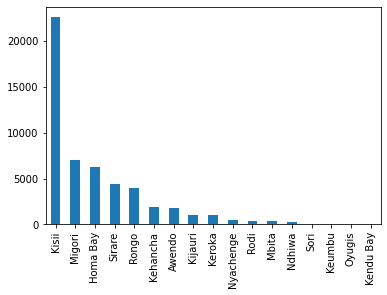

In [8]:
dpdt['travel_from'].value_counts().plot(kind='bar')
plt.show()

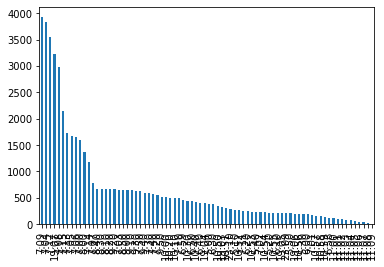

In [9]:
dpdt['travel_time'].value_counts().plot(kind='bar')
plt.show()

**Comment**

* kisii is the top place from where more number of Rides Originates.

## **Finding Our Target Variable**

As we do not have labeled/Target variable ,first we have to find labeled variable.

So, I will find count of each ride_id and that will be number_of_ticket as our target variable.

In [10]:
label=dpdt.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


#### As we found our target variable so let's dropout the duplicate values from ride_id 

In [11]:
dpdt=dpdt.drop_duplicates("ride_id")

In [12]:
dpdt.shape

(6249, 10)

lets create final dataset having dependent and independent variables

In [13]:
dpdt = dpdt.merge(label, how="left",on="ride_id")
dpdt.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Lets drop out some irrelevant features, which are not going to help for predicting the target variable

In [14]:
dpdt = dpdt.drop(['seat_number','payment_method','payment_receipt'], axis=1)

There are Total 51645 observations in the dataset.

And has 10 Columns.